Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

1. Import the required libraries and modules that you would need.
2. Read that data into Python and call the dataframe churnData.
3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
4. Check for null values in the dataframe. Replace the null values.
5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    5.a. Scale the features either by using normalizer or a standard scaler.
    5.b. Split the data into a training set and a test set.
    5.c. Fit a logistic Regression model on the training data.
    5.d. Fit a Knn Classifier model on the training data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
pd.options.display.max_rows = 50
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from matplotlib import pyplot
import matplotlib.pyplot
from sklearn.model_selection import GridSearchCV

# Loading data

In [2]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [3]:
churnData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

Cleaning data

In [4]:
# Checking the data types to see if they are correct.

In [5]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# I should change the data for column TotalCharges, object to float.

churnData["TotalCharges"] =  pd.to_numeric(churnData["TotalCharges"], errors='coerce')

In [7]:
# Checking if there are missing values in the dataframe.
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# I will replace the missing values.
mean_TotalCharges=np.mean(churnData['TotalCharges'])
churnData['TotalCharges']= churnData['TotalCharges'].fillna(mean_TotalCharges)

In [9]:
# The target variable is churn. I will replace the current values to No-->0 and Yes-->1.
churnData['Churn'] = churnData['Churn'].replace({'Yes': "1"})

In [10]:
churnData['Churn'] = churnData['Churn'].replace({'No': "0"})
churnData['Churn'].unique()

array(['0', '1'], dtype=object)

In [11]:
print(set([type(item) for item in churnData["Churn"]]))

{<class 'str'>}


In [12]:
churnData["Churn"] = pd.to_numeric(churnData["Churn"], errors='coerce')

In [13]:
print(set([type(item) for item in churnData["Churn"]]))

{<class 'int'>}


# Create  new data

5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

    5.a. Scale the features either by using normalizer or a standard scaler.

In [14]:
new_churnData = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn']]
new_churnData

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


## Logistic Regression & Standard Scaler numerical

### X/y splitting

In [165]:
X = new_churnData.drop(columns=["Churn"], axis=1)
y = new_churnData["Churn"]
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Data Splitting

In [166]:
# I will use standardscaler for the data. 
# I will fit it using train set and then apply this fit to both, train set and test set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

getting value counts on numpy array

In [167]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5174, 1869]))

## Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.787540,0.807665
1,Precision,0.645570,0.699219
2,Recall,0.443182,0.479893


Confusion matrix for the train set
[[3774  364]
 [ 833  663]]


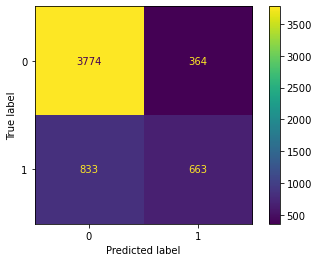



Confusion matrix for the test set
[[959  77]
 [194 179]]


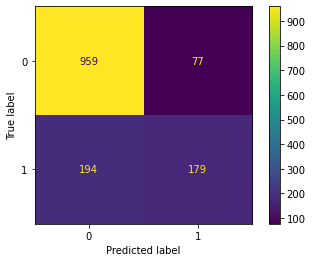

In [168]:
log_model = LogisticRegression() 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [19]:
# From the model metrics: 

# Accuracy is pretty good. 78% of the data is correctly predicted.
# Precision is 64%. 64% of all of the predicted positive records were really positive. Not so good result.
# Recall is 44%. 44% of all the really positive records were predicted to be positive. Quite bad result.

## KNN Classifier

In [20]:
## StandardScaler
from sklearn.linear_model import LogisticRegression
knn_model = KNeighborsClassifier() 

## Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.789492,0.800568
1,Precision,0.648491,0.691700
2,Recall,0.446680,0.462963


Confusion matrix for the train set
[[3782  361]
 [ 825  666]]


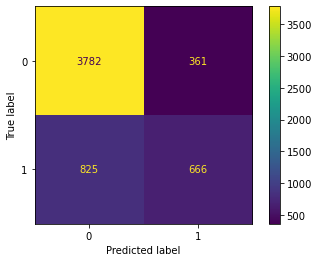



Confusion matrix for the test set
[[953  78]
 [203 175]]


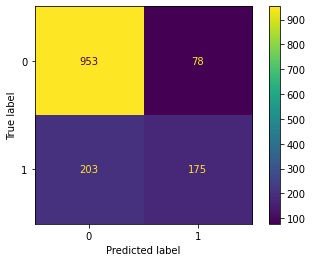

In [21]:
##KNNClassifier

knn_model.fit(X_train_mod, y_train)
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

In [22]:
# Another way of computing.

# from sklearn.metrics import classification_report

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

## Decision trees

,Error_metric,Train,Test
0,Accuracy,0.784523,0.784244
1,Precision,0.647184,0.672897
2,Recall,0.408451,0.380952


Confusion matrix for the train set
[[3811  882]
 [ 332  609]]


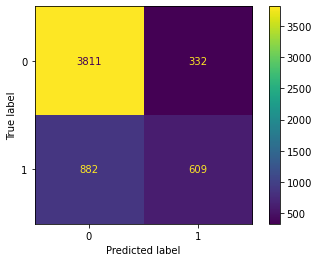



Confusion matrix for the test set
[[961 234]
 [ 70 144]]


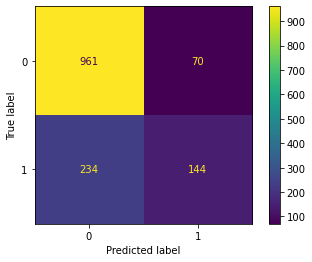

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

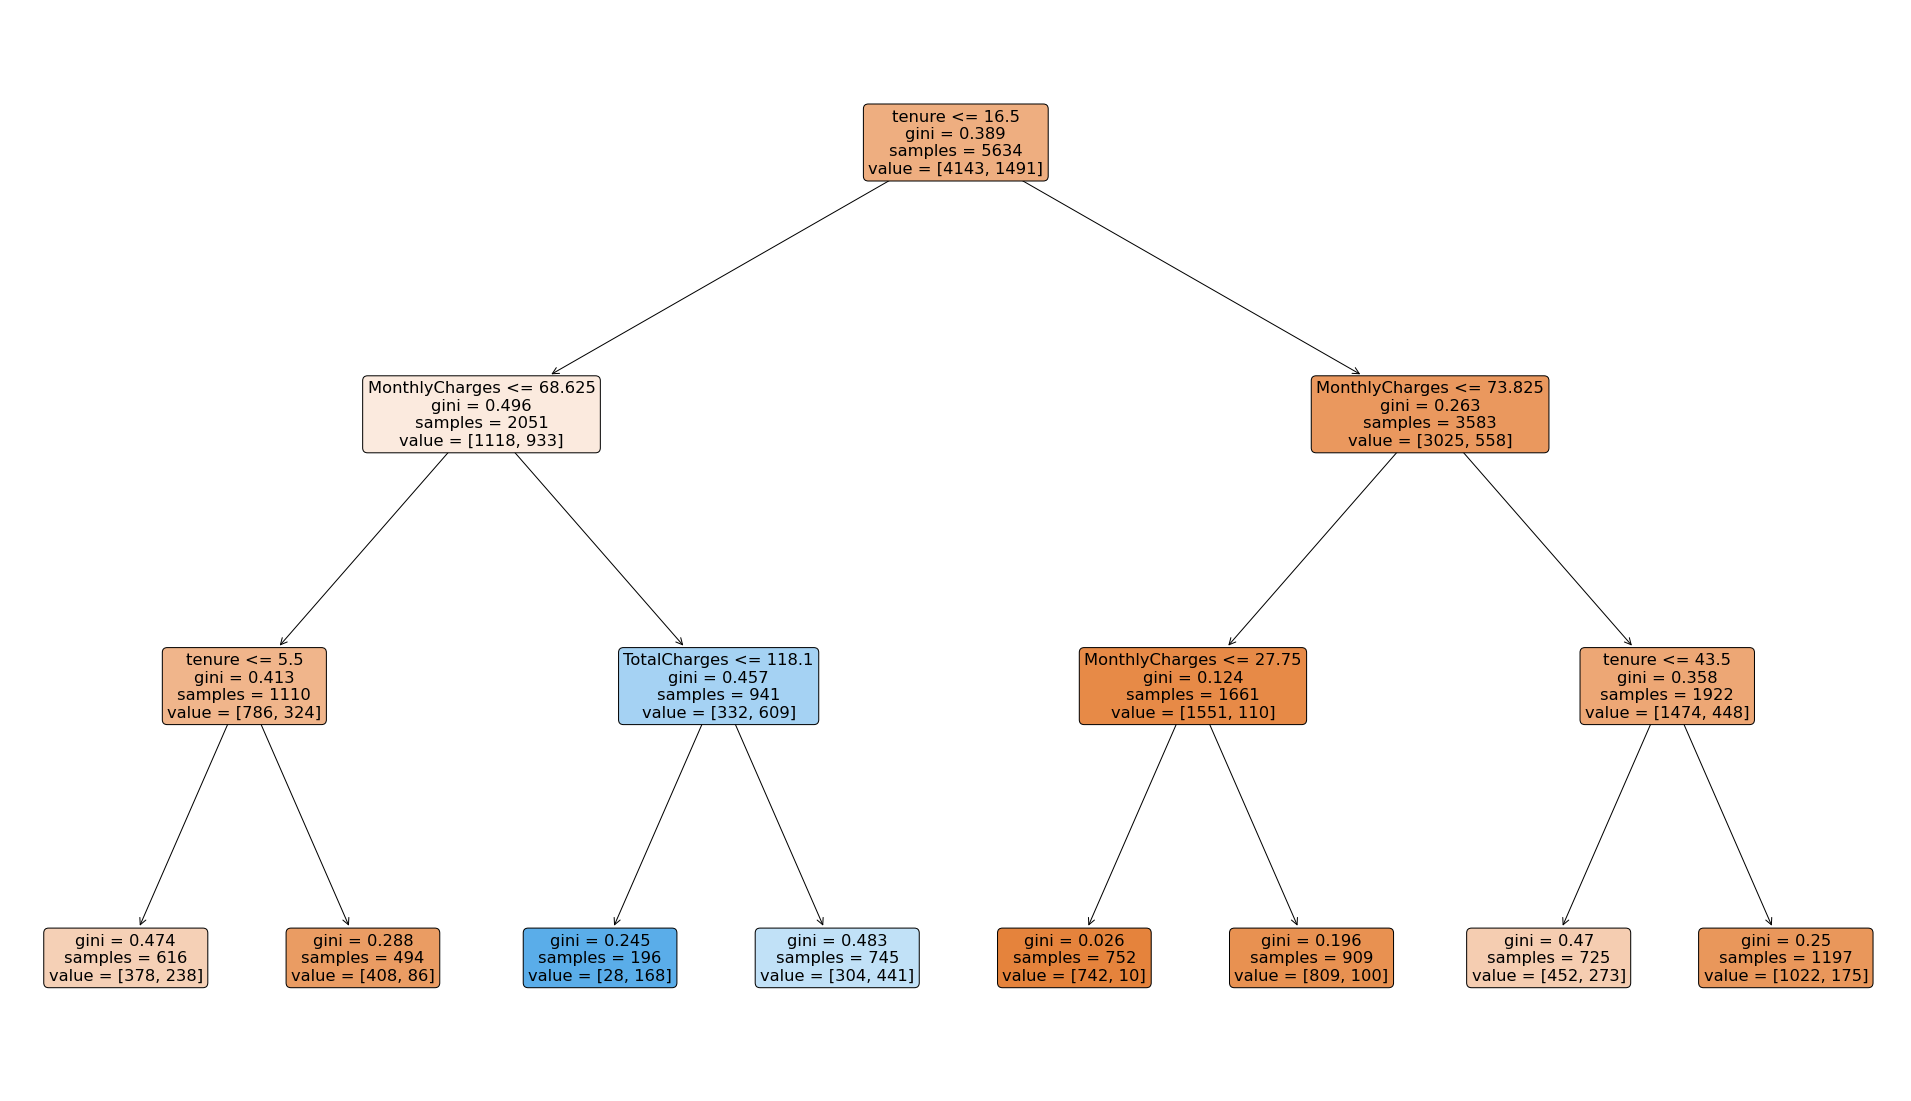

In [25]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

# Trying the same models, with only categorical variables

In [26]:
categoricals_churnData= churnData.select_dtypes("object")
categoricals_churnData

,gender,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month
1,Male,No,No,Yes,Yes,No,Yes,No,No,No,One year
2,Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month
3,Male,No,No,No,Yes,No,Yes,Yes,No,No,One year
4,Female,No,No,Yes,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month
7041,Male,Yes,No,Yes,No,No,No,No,No,No,Month-to-month


In [27]:
# get dummies pandas
categoricals_churnData = pd.get_dummies(categoricals_churnData, drop_first=True)

In [28]:
categoricals_churnData

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Split X, y

In [29]:
X_categoricals = categoricals_churnData
y_categoricals = new_churnData["Churn"]

## data splitting

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_categoricals, y_categoricals, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
#X_train = pd.DataFrame(X_train, columns= X.columns)
#X_test = pd.DataFrame(X_test, columns= X.columns)

## Logistic regresion

In [31]:
## Randond_state should be included also here
log_model = LogisticRegression(random_state=11) 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.771211,0.780696
1,Precision,0.581304,0.596386
2,Recall,0.494652,0.530831


Confusion matrix for the train set
[[3605  533]
 [ 756  740]]


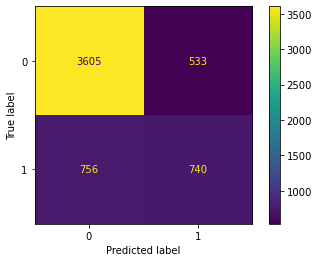



Confusion matrix for the test set
[[902 134]
 [175 198]]


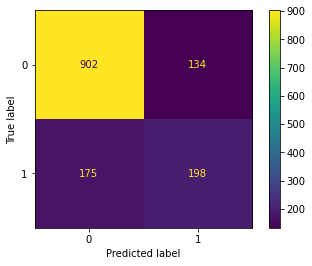

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## KNNClassifier - Categorical

In [33]:
## StandardScaler
from sklearn.linear_model import LogisticRegression
knn_model = KNeighborsClassifier(n_neighbors=5) 

## Data Splitting
#X_train, X_test, y_train, y_test = train_test_split(X_categoricals, y_categoricals, test_size=0.20, random_state=11)

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.771211,0.780696
1,Precision,0.581304,0.596386
2,Recall,0.494652,0.530831


Confusion matrix for the train set
[[3605  533]
 [ 756  740]]


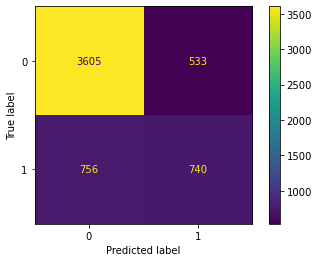



Confusion matrix for the test set
[[902 134]
 [175 198]]


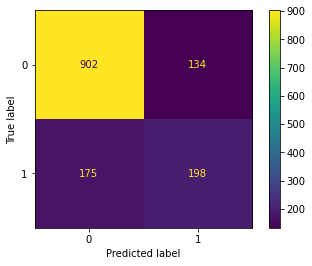

In [34]:
##KNNClassifier

knn_model.fit(X_train_mod, y_train)
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Decision trees categorical

,Error_metric,Train,Test
0,Accuracy,0.742989,0.740241
1,Precision,0.511450,0.506542
2,Recall,0.716578,0.726542


Confusion matrix for the train set
[[3114  424]
 [1024 1072]]


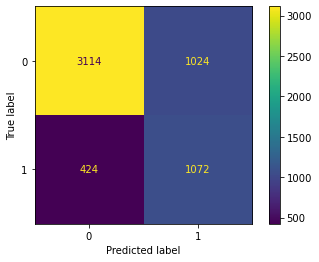



Confusion matrix for the test set
[[772 102]
 [264 271]]


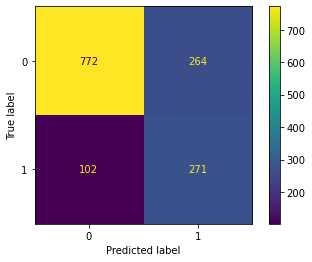

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(X_categoricals, y_categoricals, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

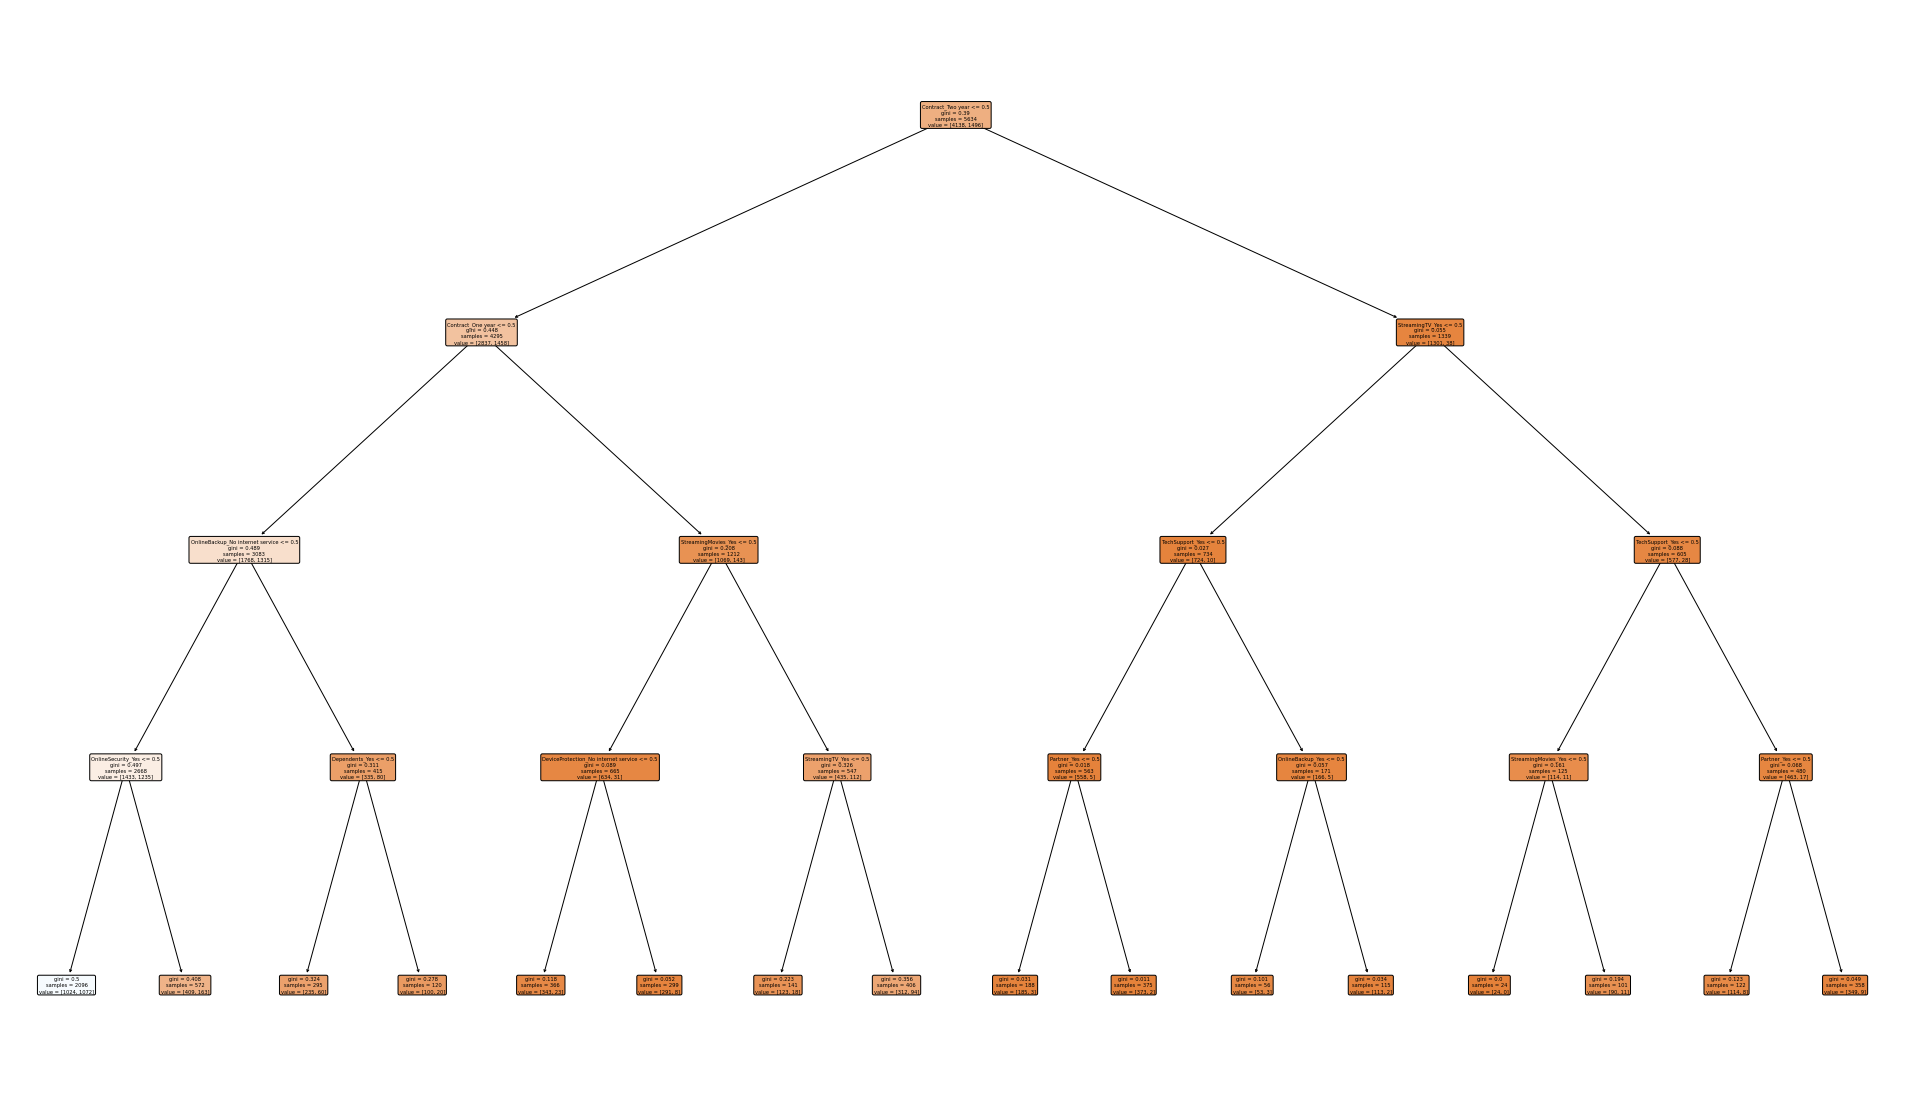

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_categoricals.columns)
plt.show() 

# Trying the models again, using numerical and categorical features together

Split X, y all data

In [37]:
X_all = pd.concat(([new_churnData,categoricals_churnData]), axis=1).drop(columns=["Churn"])
X_all

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,2,0,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,45,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,2,0,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [76]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

## Data splitting 

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.20, random_state=42)

# training datasets to DataFrame again to manipulate them
#X_train = pd.DataFrame(X_train, columns= X.columns)
#X_test = pd.DataFrame(X_test, columns= X.columns)

## Logistic regresion

In [169]:
log_model = LogisticRegression() 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.796947,0.816891
1,Precision,0.643089,0.680251
2,Recall,0.528743,0.581769


Confusion matrix for the train set
[[3699  439]
 [ 705  791]]


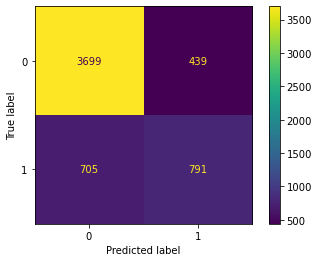



Confusion matrix for the test set
[[934 102]
 [156 217]]


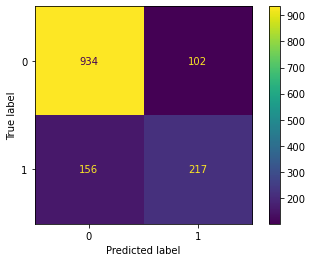

In [41]:
## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Knn clasiffier categorical and numerical, all data

In [43]:
## StandardScaler
from sklearn.linear_model import LogisticRegression
knn_model = KNeighborsClassifier() 

## Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.20, random_state=11)

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)


,Error_metric,Train,Test
0,Accuracy,0.801384,0.800568
1,Precision,0.650242,0.659016
2,Recall,0.539906,0.531746


Confusion matrix for the train set
[[3710  433]
 [ 686  805]]


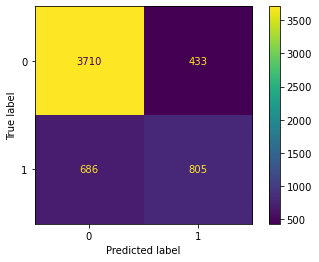



Confusion matrix for the test set
[[927 104]
 [177 201]]


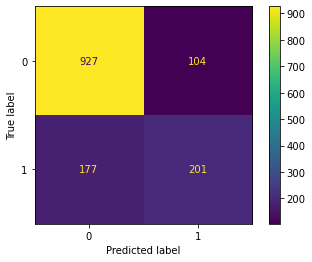

In [44]:
##KNNClassifier

knn_model.fit(X_train_mod, y_train)
y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Decision trees all data

,Error_metric,Train,Test
0,Accuracy,0.773518,0.777147
1,Precision,0.582629,0.600000
2,Recall,0.508384,0.507937


Confusion matrix for the train set
[[3600  733]
 [ 543  758]]


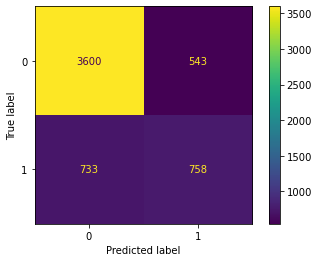



Confusion matrix for the test set
[[903 186]
 [128 192]]


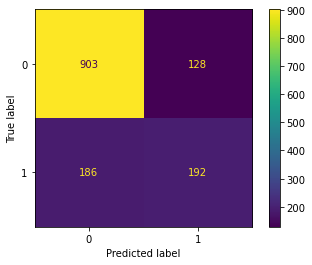

In [45]:
# Changing also max features and min sample to see how this affects my results.

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 

dt = DecisionTreeClassifier(max_depth=4, max_features=3, min_samples_leaf=150)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

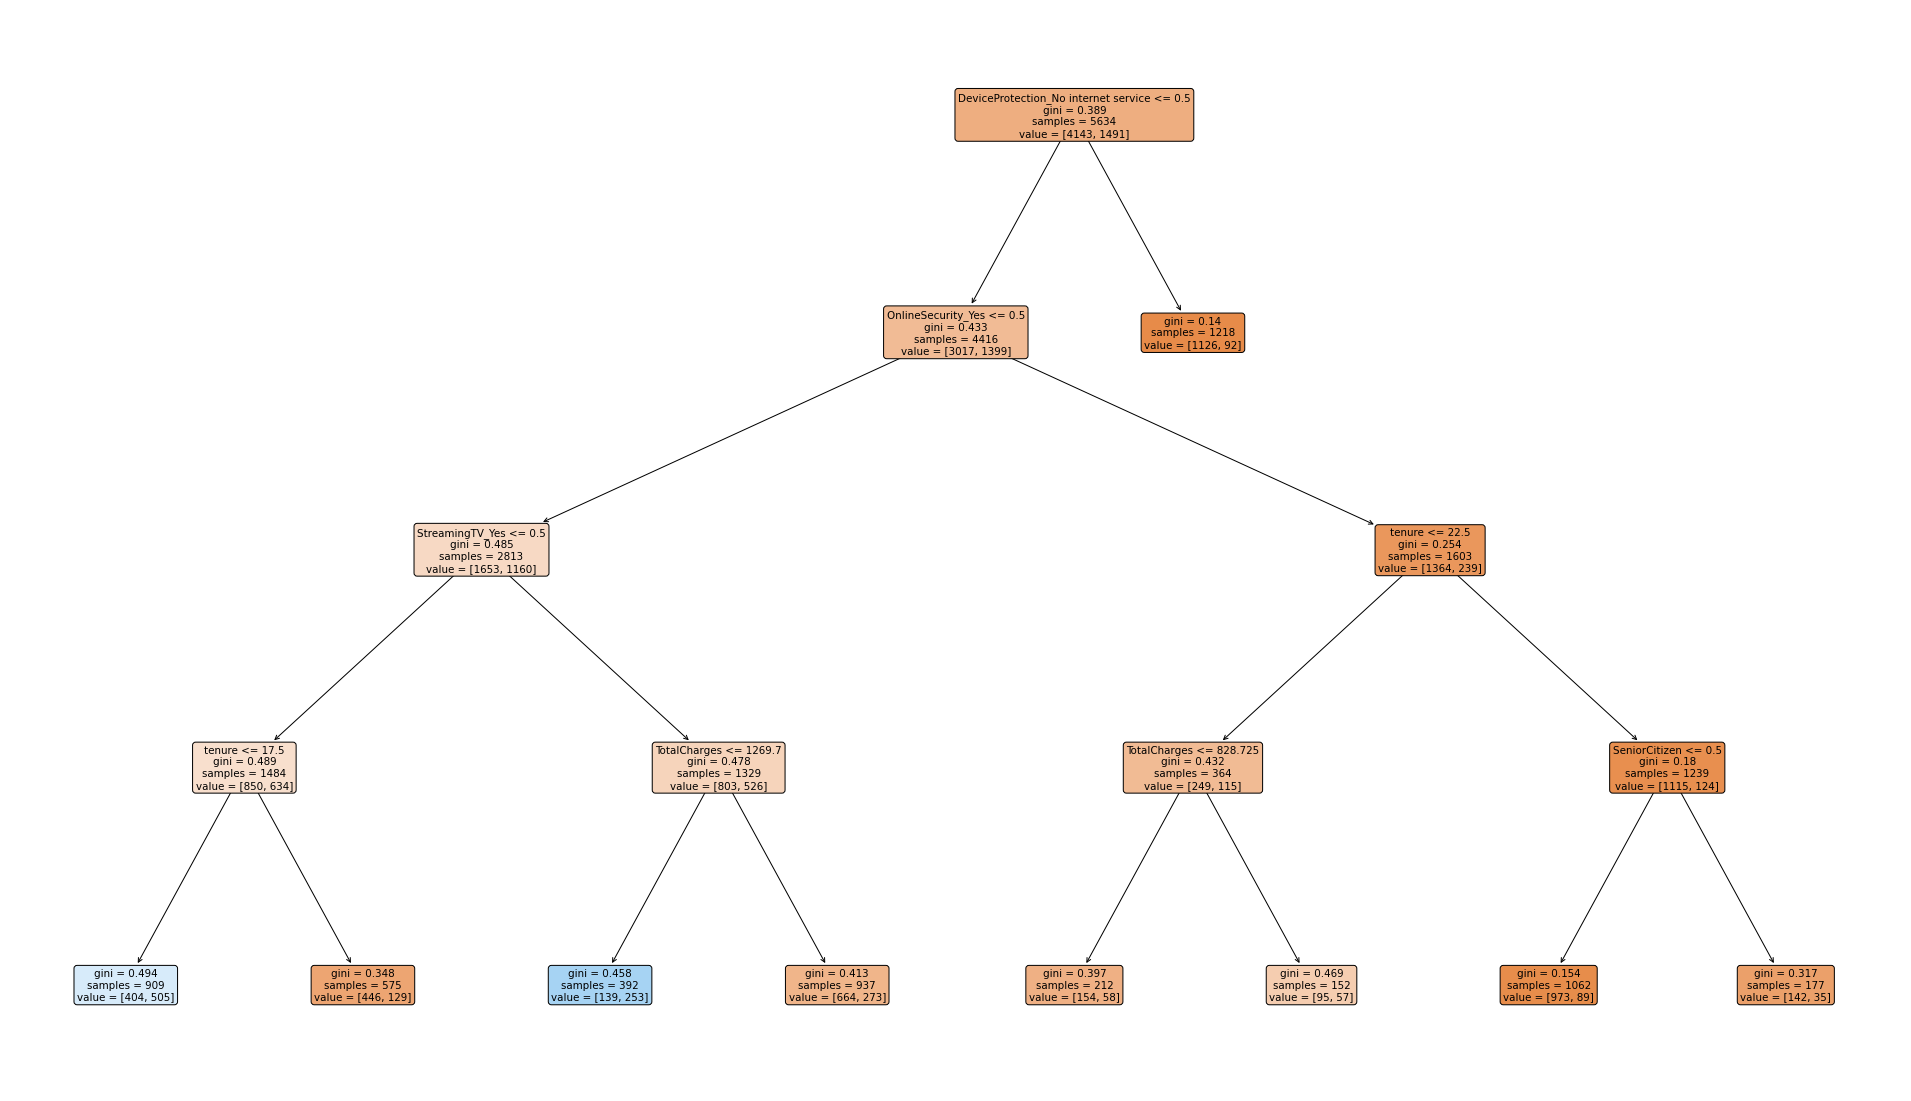

In [46]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_all.columns)
plt.show() 

# Classification Feature Importance

In [47]:
# Feature importance with CART, after decision tree.

# When you use enumerate(), the function gives you back two loop variables:
# The count of the current iteration
# The value of the item at the current iteration

Feature: 0, Score: 0.07574
Feature: 1, Score: 0.11272
Feature: 2, Score: 0.00960
Feature: 3, Score: 0.00362
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.01436
Feature: 6, Score: 0.00475
Feature: 7, Score: 0.02024
Feature: 8, Score: 0.01129
Feature: 9, Score: 0.00322
Feature: 10, Score: 0.01276
Feature: 11, Score: 0.02538
Feature: 12, Score: 0.03541
Feature: 13, Score: 0.01507
Feature: 14, Score: 0.20789
Feature: 15, Score: 0.00643
Feature: 16, Score: 0.01179
Feature: 17, Score: 0.01269
Feature: 18, Score: 0.05417
Feature: 19, Score: 0.00360
Feature: 20, Score: 0.01648
Feature: 21, Score: 0.34279


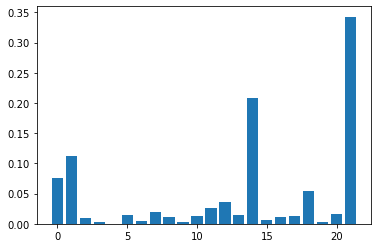

In [48]:
# decision tree for feature importance on a classification problem
## source: https://machinelearningmastery.com/calculate-feature-importance-with-python/

# define dataset
X, y = make_classification(n_samples=1000, n_features=22, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

spliting X, y

In [49]:
## I will try model again, using only more important features. 0,1,14,18,20,21

In [50]:
## create a new dataframe with the most important features
X_features=X_all[["tenure", "SeniorCitizen", "TechSupport_No internet service", "StreamingMovies_No internet service", "Contract_One year", "Contract_Two year"]]
y_features= new_churnData["Churn"]
X_features

,tenure,SeniorCitizen,TechSupport_No internet service,StreamingMovies_No internet service,Contract_One year,Contract_Two year
0,1,0,0,0,0,0
1,34,0,0,0,1,0
2,2,0,0,0,0,0
3,45,0,0,0,1,0
4,2,0,0,0,0,0
...,...,...,...,...,...,...
7038,24,0,0,0,1,0
7039,72,0,0,0,1,0
7040,11,0,0,0,0,0
7041,4,1,0,0,0,0


In [51]:
y

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

## Logistic Regression - Selected Features

In [52]:
## The results are going to be the same if I keep always the same number in random_state. It helps to have consistency

X_train, X_test, y_train, y_test = train_test_split(X_features, y_features, test_size=0.20, random_state=11)

In [53]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.777955,0.789212
1,Precision,0.598684,0.634551
2,Recall,0.488263,0.505291


Confusion matrix for the train set
[[3655  488]
 [ 763  728]]


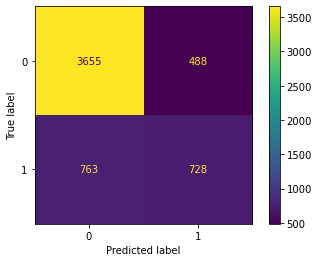



Confusion matrix for the test set
[[921 110]
 [187 191]]


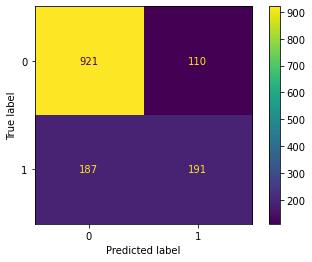

In [54]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

## KNN Classifier - Selected features

,Error_metric,Train,Test
0,Accuracy,0.772098,0.762952
1,Precision,0.587935,0.580292
2,Recall,0.464118,0.420635


Confusion matrix for the train set
[[3658  485]
 [ 799  692]]


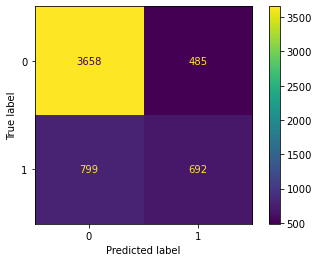



Confusion matrix for the test set
[[916 115]
 [219 159]]


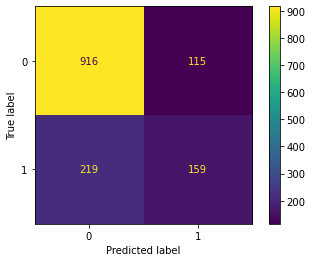

In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# KNN

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
y_pred_train_log = knn_model.predict(X_train_scaled)
y_pred_test_log = knn_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(knn_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(knn_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

## Decision Trees - Selected features

,Error_metric,Train,Test
0,Accuracy,0.765886,0.772179
1,Precision,0.556803,0.576408
2,Recall,0.565392,0.568783


Confusion matrix for the train set
[[3472  648]
 [ 671  843]]


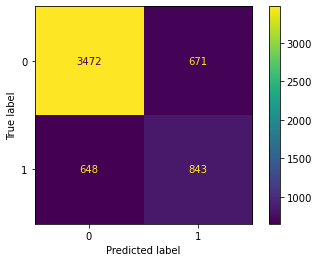



Confusion matrix for the test set
[[873 163]
 [158 215]]


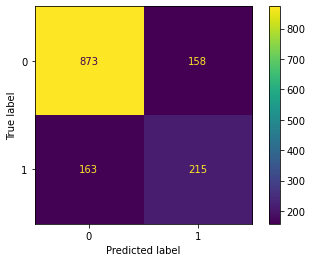

In [56]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Decision tree

dt = DecisionTreeClassifier(max_depth=4)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

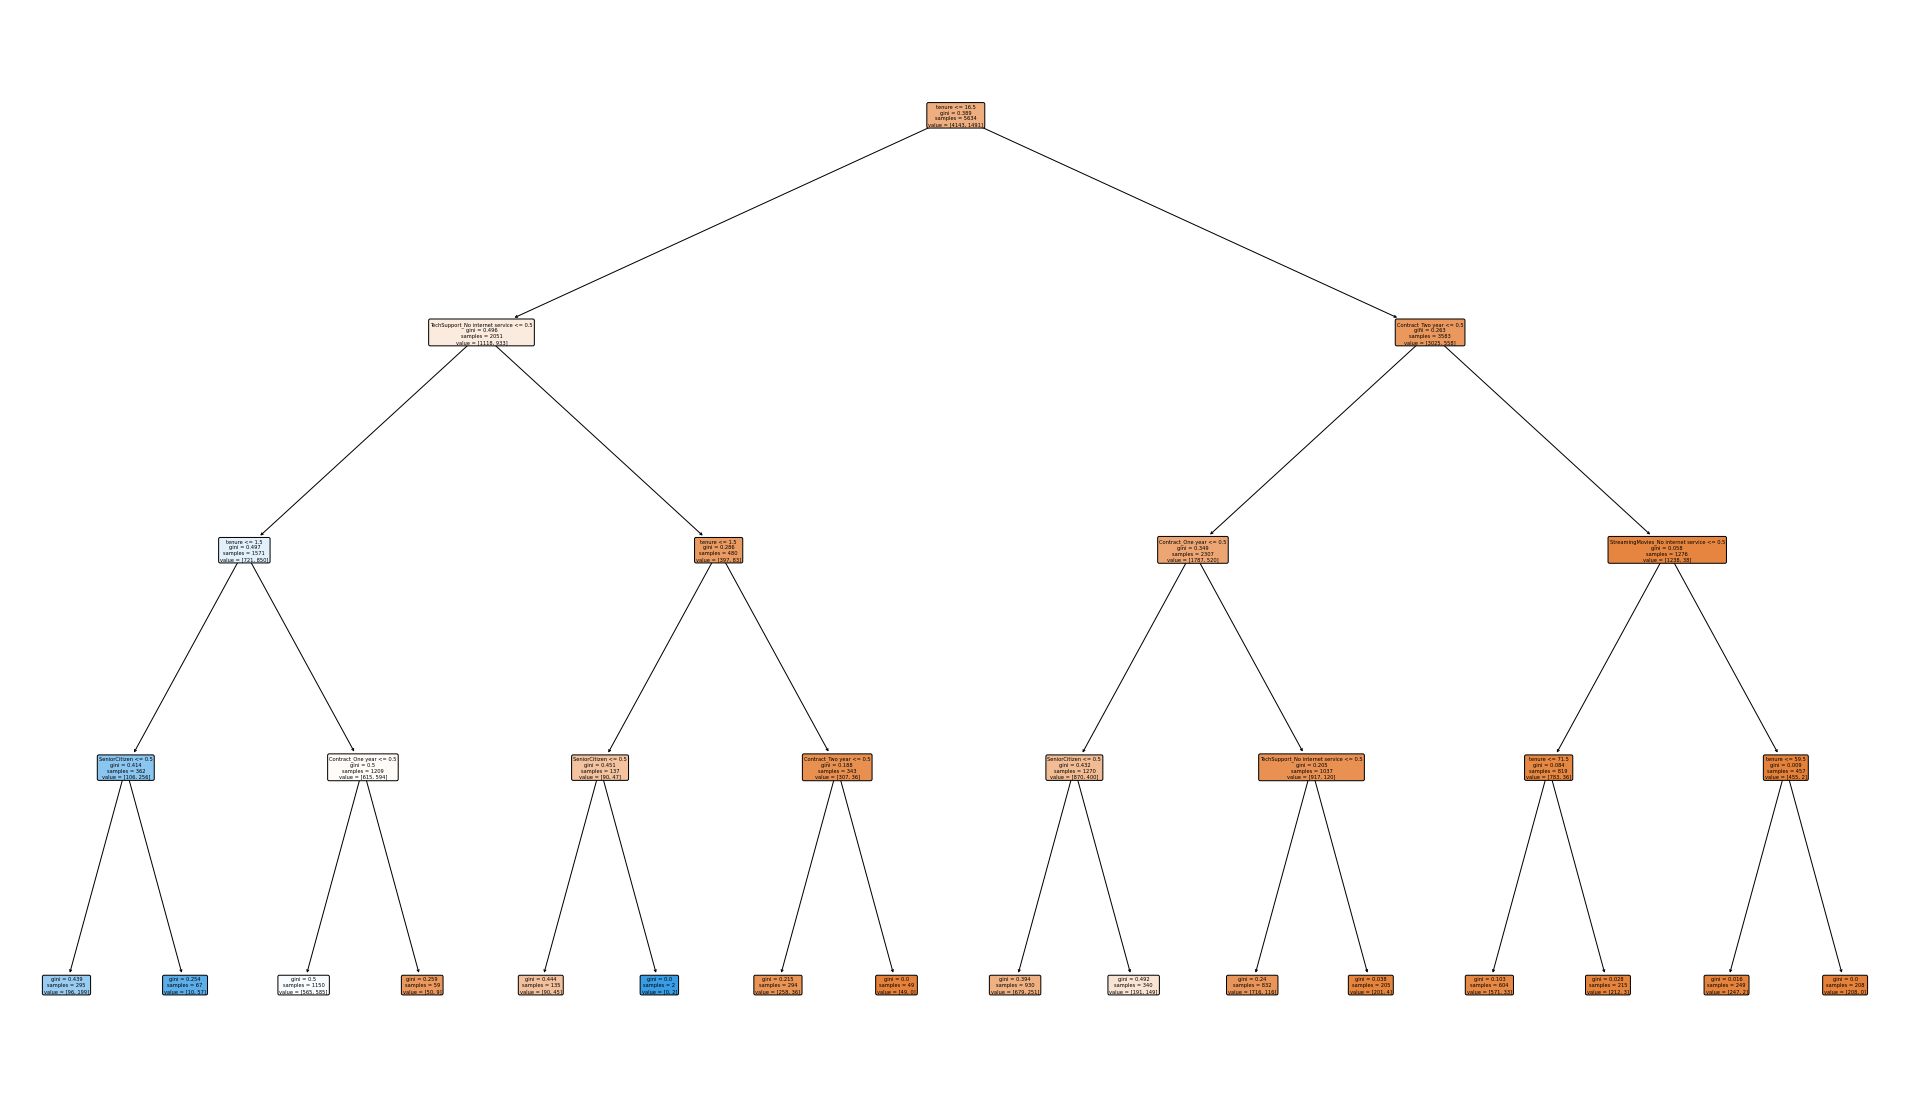

In [57]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_features.columns)
plt.show()

In [58]:
# The best model so far: KNN with only selected columns from the feature selection.

# Cross validation, bias and variance handeling

In [59]:
# I will use cross validation for the decision tree model (made with numerical and categorical data)
# to evaluate the performance of the model.

In [60]:
set(y)

{0, 1}

In [61]:
scores=cross_val_score(model, X_train, y_train, cv=5)
scores

array([0.75865129, 0.7826087 , 0.77373558, 0.76042591, 0.77087034])

In [62]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.77 accuracy with a standard deviation of 0.01


In [63]:
y_test

6625    1
5975    1
6891    0
1681    0
4780    0
       ..
6525    0
710     1
6639    0
6844    0
2736    0
Name: Churn, Length: 1409, dtype: int64

In [64]:
y_pred = cross_val_predict(model, X_test, y_test, cv=5)
y_pred

array([1, 1, 1, ..., 0, 0, 0])

# Models Comparision

In [65]:
# Conclusion:
#DecisTreeClassif: 0.7752535496957405,
#LogisticRegression: 0.78052738336714,
#KNeighborsClassif: 0.7596348884381339

In [66]:
# I will compare different models to see, which one has the highest accuracy.

model1 = DecisionTreeClassifier()

model2 = LogisticRegression()

model3 = KNeighborsClassifier()


model_pipeline = [model1, model2, model3]
model_names = ['DecisTreeClassif', 'LogRegres', 'KNeigClassif']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'DecisTreeClassif': 0.7692583620829597, 'LogRegres': 0.7768905013546078, 'KNeigClassif': 0.7513334100340268}


In [67]:
# Logistic regression model has the best accuracy (0.776) after using cross validation. Before it was .

# Managing imbalance in the dataset

Check for the imbalance.

Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

Each time fit the model and see how the accuracy of the model is.

# Downsampling all data

In downsampling, we randomly sample without replacement from the majority class

In [68]:
X_all

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,2,0,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,45,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,2,0,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [77]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [78]:
X = pd.concat([X_all,y], axis = 1)
X

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn
0,1,0,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
2,2,0,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
3,45,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0
4,2,0,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [79]:
# I will check the imbalance of the target variable.

y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [80]:
5174/len(y)

0.7346301292063041

In [81]:
category_0 = X[X['Churn'] == 0]
category_1 = X[X['Churn'] == 1]

In [82]:
category_0.shape

(5174, 23)

In [83]:
category_1.shape

(1869, 23)

In [84]:
# The data is imbalaced, so I will use different methods to deal with this and see the differences.

category_0_down = category_0.sample(len(category_1,))
print(category_0.shape)
print(category_1.shape)

(5174, 23)
(1869, 23)


In [85]:
X = pd.concat([category_0_down, category_1], axis=0)
#shuffling the data
X_down= X.sample(frac=1)
X_down['Churn'].value_counts()

1    1869
0    1869
Name: Churn, dtype: int64

In [86]:
X_down

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,Churn
902,17,0,93.85,1625.65,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
3522,37,0,19.80,677.05,1,1,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0
6607,1,0,25.30,25.30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
20,1,1,39.65,39.65,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
2431,2,1,24.45,47.50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,7,0,75.10,552.95,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4364,63,0,80.30,4995.35,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0
4841,24,0,94.60,2283.15,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
5576,1,0,53.55,53.55,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [87]:
# I have a downsampled data. I will run the logistic regression model again.

## Logistic Regression & Standard Scaler after Downsampling using all data

## Defining X and y

In [88]:
X_down = X.drop(columns=['Churn'], axis=1)
y_down = X['Churn']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size=0.20, random_state=42)

## Logistic Regresion after Downsampling

In [90]:
# Conclusion:Accuracy	0.770569	0.752674
#            Precision	0.754190	0.718826
#            Recall 	0.807309	0.807692

In [91]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.769231,0.775401
1,Precision,0.750619,0.751880
2,Recall,0.808667,0.813008


Confusion matrix for the train set
[[1087  403]
 [ 287 1213]]


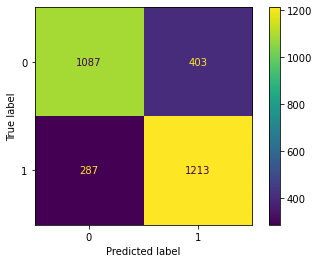



Confusion matrix for the test set
[[280  99]
 [ 69 300]]


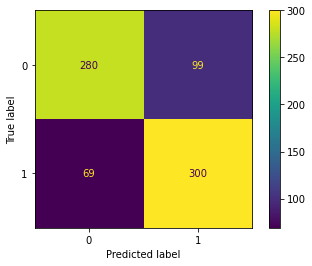

In [92]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

In [93]:
# The recall improved a lot: from 0.58 to 0.79 on test data.

# Upsampling Method 1 - all data

In [94]:
#category_1
#category_0

In [95]:
category_1_up = category_1.sample(len(category_0), replace=True)
print(category_1_up.shape)

(5174, 23)


In [96]:
category_1_up.shape

(5174, 23)

In [97]:
X = pd.concat([category_0, category_1_up], axis=0)
#shuffling the data
X = X.sample(frac=1)
X['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

# Logistic Regression & Standard Scaler after Upsampling Method 1 - all data

In [98]:
# Conclusion: Accuracy	0.765644	0.770531
#             Precision	0.748880	0.746104
#.            Recall	0.803220	0.804348

In [99]:
X_up = X.drop(columns=['Churn'], axis=1)
y_up = X['Churn']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.20, random_state=42)

In [101]:
std_scaler = StandardScaler().fit(X_train)
X_train_scaled = std_scaler.transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.761416,0.766184
1,Precision,0.743068,0.749769
2,Recall,0.800916,0.792195


Confusion matrix for the train set
[[2980 1149]
 [ 826 3323]]


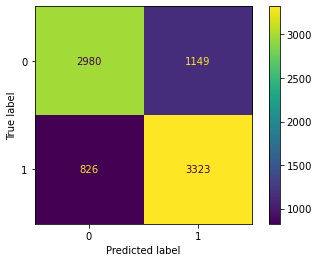



Confusion matrix for the test set
[[774 271]
 [213 812]]


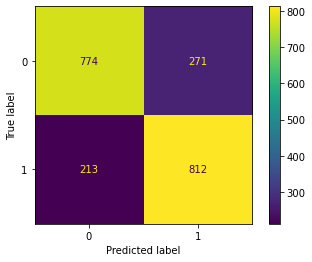

In [102]:
# Logistic regression

log_model = LogisticRegression() 
log_model.fit(X_train_scaled, y_train)
y_pred_train_log = log_model.predict(X_train_scaled)
y_pred_test_log = log_model.predict(X_test_scaled)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_scaled,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_scaled,y_test, values_format = 'd')
plt.show()

# Upsampling using SMOTE - all data

In [103]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [104]:
X_all

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,2,0,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,45,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,2,0,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
X_all

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
0,1,0,29.85,29.85,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,34,0,56.95,1889.50,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0
2,2,0,53.85,108.15,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
3,45,0,42.30,1840.75,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
4,2,0,70.70,151.65,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,0,84.80,1990.50,1,1,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0
7039,72,0,103.20,7362.90,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0
7040,11,0,29.60,346.45,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
7041,4,1,74.40,306.60,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [111]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

# Logistic Regression & Standard Scaler after Upsampling Smote - all data

In [112]:
# Conclusion: Accuracy	0.796947	0.816891
#             Precision	0.643089	0.680251
#             Recall	0.528743	0.581769

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.20, random_state=42)

In [114]:
## Randond_state should be included also here
log_model = LogisticRegression(random_state=11) 

trans = StandardScaler()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

,Error_metric,Train,Test
0,Accuracy,0.796947,0.816891
1,Precision,0.643089,0.680251
2,Recall,0.528743,0.581769


Confusion matrix for the train set
[[3699  439]
 [ 705  791]]


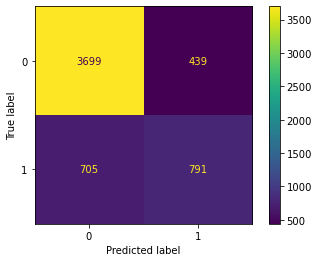



Confusion matrix for the test set
[[934 102]
 [156 217]]


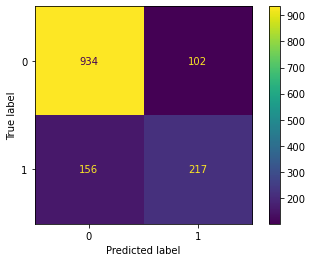

In [115]:
## Logistic regression
log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

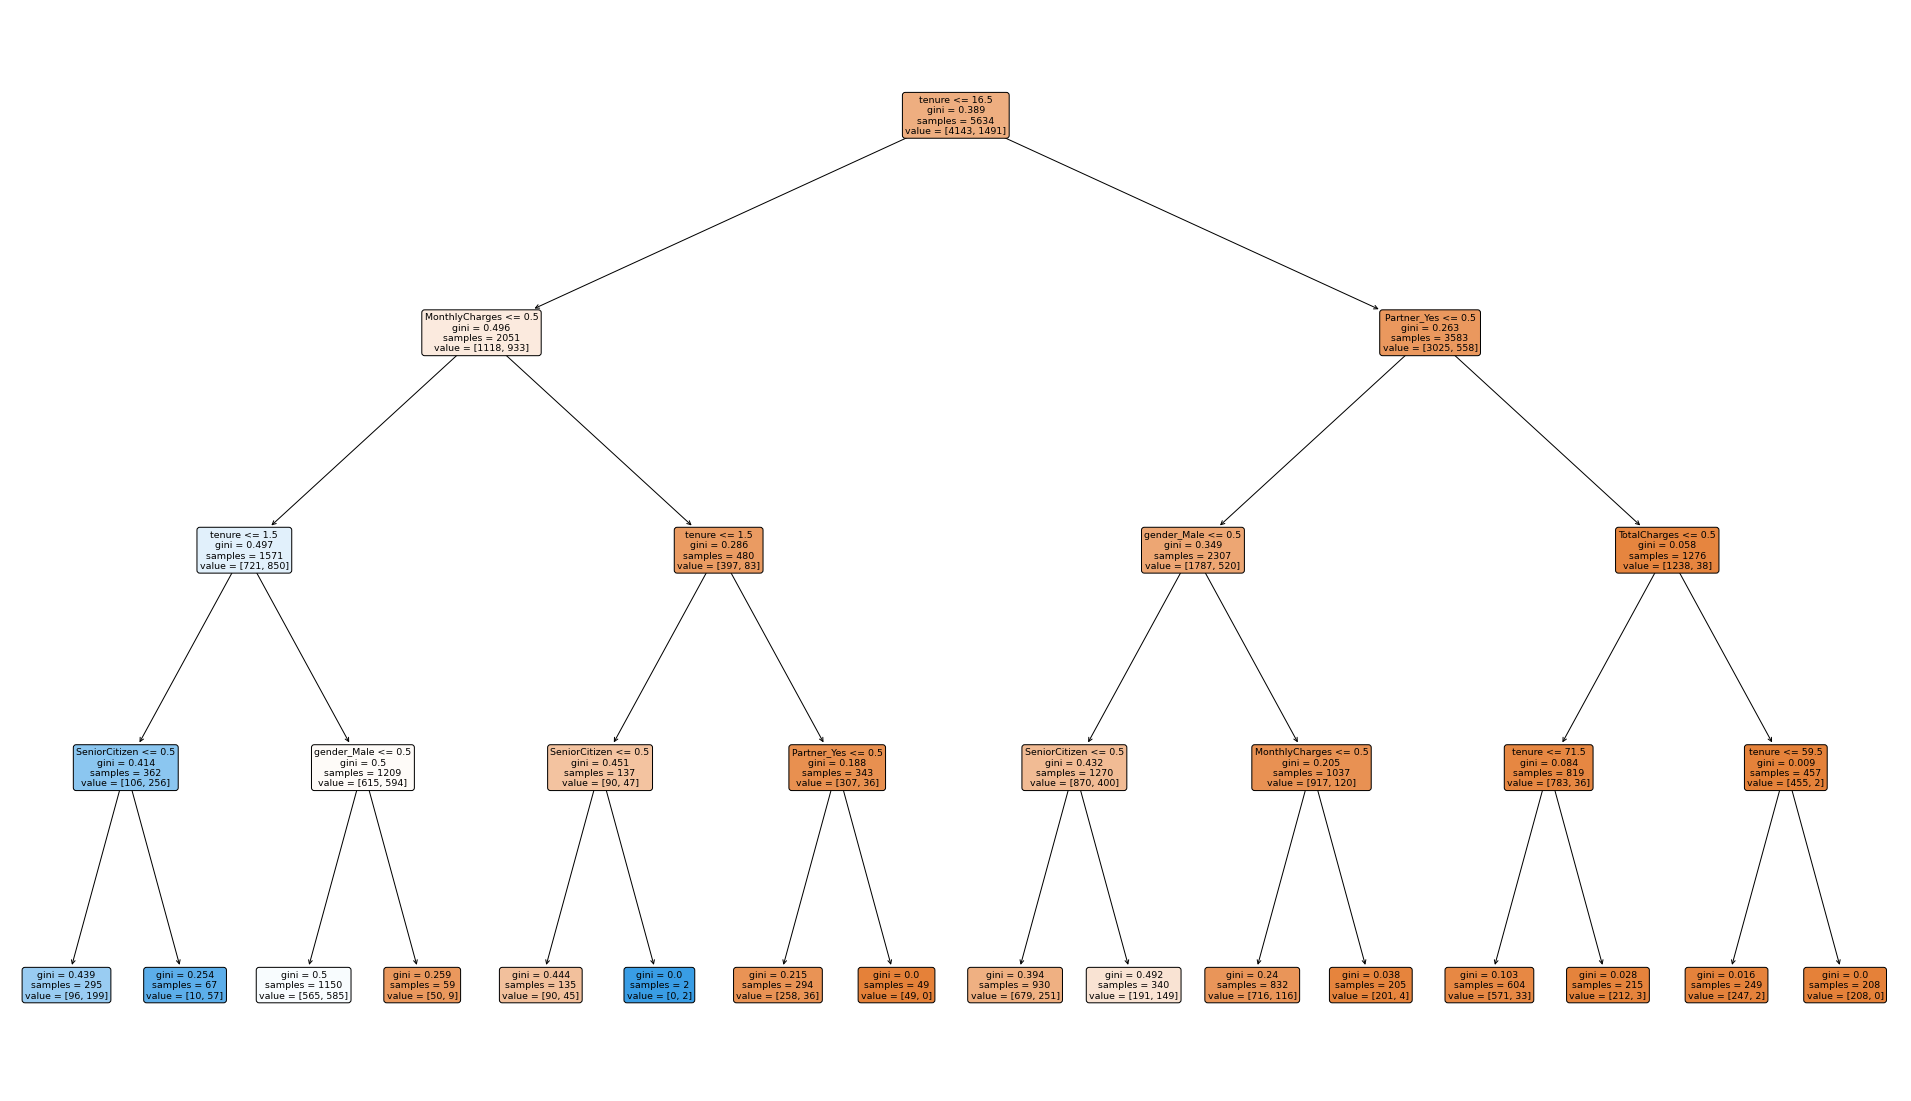

In [117]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(dt,filled = True, rounded=True,feature_names=X_all.columns)
plt.show() 

# Conclusions

The best model so far is with logistic regression, using numerical and categorical data, using upsampling.
Cross validation with logistic regression: 0.767.

In [118]:
#LR with_upsampling (num+categ): Accuracy	0.765644	0.770531
#                                Precision	0.748880	0.746104
#                                Recall 	0.803220	0.804348

In [119]:
# Logistic regression (num+categ): Accuracy  0.80  0.81 
#                                  Precision 0.64  0.70
#                                  Recall    0.53  0.56

# LR with downsampling (num+cat):  Accuracy  0.77  0.74
#                                  Precision 0.76  0.74
#                                  Recall    0.81  0.77

# LR with upsampling (num+cat):    Accuracy  0.77  0.77
#                                  Precision 0.75  0.75
#                                  Recall    0.81  0.81

# LR with SMOTE (num+cat):         Accuracy  0.80  0.81
#                                  Precision 0.64  0.70
#                                  Recall    0.53  0.56

# Random forest - all data

1. fit a Random forest Classifier on the data and compare the accuracy.

2. tune the hyper paramters with gridsearch and check the results.


In [120]:
# I use data after upsampling because i have best result
# Conclusion:Accuracy	0.765644	0.770531
#            Precision	0.748880	0.746104
#            Recall 	0.803220	0.804348

X_up

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
2048,21,1,96.80,2030.30,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0
5942,9,0,48.75,442.20,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
6174,4,0,29.65,118.50,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2676,29,0,20.35,617.35,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
6434,1,0,50.50,50.50,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,51,0,83.25,4089.45,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1
3532,15,0,59.45,892.65,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2373,66,0,49.40,3251.85,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4288,3,0,91.85,257.05,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [121]:
y_up.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

We will balance the dataset Here we will downsample category 0, so that the model trains faster

In [122]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.25, random_state=0)

In [123]:
# Applying the random forest.
# max_features="sqrt" - this didn't change the final scores.
# If I use less max_depth, the scores are lower.
# Nr of estimators - tried with 30, 50, 100 - scores didn't change much.

clf = RandomForestClassifier(max_depth=12, n_estimators=30, bootstrap=True, oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9202422368251514
0.8554310011596443


In [124]:
# Using cross validation. Receiving accuracy scores.

clf = RandomForestClassifier(max_depth=12, n_estimators=30, bootstrap=True, oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.8454604 , 0.84664948, 0.85115979, 0.8492268 , 0.84600515])

In [125]:
# Using cross validation. Receiving recall scores.

clf = RandomForestClassifier(max_depth=12, n_estimators=30, bootstrap=True, oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = "recall")
cross_val_scores

array([0.92755498, 0.92357513, 0.91839378, 0.91839378, 0.93134715])

In [126]:
# Checking the average score.

np.mean(cross_val_scores)

0.9238529650309341

In [127]:
# This is so far the best model.

# With upsampling using SMOTE - all data

In [128]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [129]:
X_down

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year
5203,3,0,70.70,225.65,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0
4001,45,0,109.75,4900.65,1,1,1,1,0,0,0,1,0,1,0,1,0,1,0,1,0,1
5066,44,0,54.30,2390.45,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1
3752,55,0,59.20,3175.85,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1
4385,21,0,20.35,422.70,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,12,0,59.80,727.80,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
7026,9,0,44.20,403.35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7032,1,1,75.75,75.75,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7034,67,0,102.95,6886.25,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0


In [130]:
y_down

5203    0
4001    0
5066    0
3752    0
4385    0
       ..
7021    1
7026    1
7032    1
7034    1
7041    1
Name: Churn, Length: 3738, dtype: int64

In [131]:
X_down_sm, y_down_sm = smote.fit_resample(X_down, y_down)

In [132]:
y_down_sm.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [133]:
X_down_sm.shape

(3738, 22)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X_down_sm, y_down_sm, test_size=0.25, random_state=0)

In [135]:
#y_train_regression = X_train(y_down)
#y_test_regression = X_test(y_down)

In [136]:
clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.7659650374598644
0.7518716577540107


In [137]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [138]:
# As we can see there is a huge imbalance in the data in the representation
 # of the two categories. Category 0 is represented 5174 times and category 1 is represented 1869 times.

In [139]:
# Using cross validation. Receiving accuracy scores.

clf = RandomForestClassifier(max_depth=12, n_estimators=30, bootstrap=True, oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.73262032, 0.79144385, 0.77896613, 0.74821429, 0.73571429])

In [140]:
# Using cross validation. Receiving recall scores.

clf = RandomForestClassifier(max_depth=12, n_estimators=30, bootstrap=True, oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring = "recall")
cross_val_scores

array([0.7921147 , 0.83214286, 0.8       , 0.83512545, 0.74193548])

In [141]:
# Checking the average score.

np.mean(cross_val_scores)

0.8002636968766002

# Hyperparameters and grid search

In [142]:
#X_up
#y_up
#X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size = 0.20, random_state = 123)

In [143]:
# Setting parameter values for finding out which gives the best model.

param_grid = {
    "n_estimators": [20, 50, 100],
    "min_samples_split": [2, 4],
    "min_samples_leaf" : [1, 2],
    "max_features": ["sqrt"],
    "max_depth": [25],
    }
clf = RandomForestClassifier(random_state=100)

In [144]:
# Setting the grid search.

grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [145]:
# Applying it.

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [25], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [20, 50, 100]},
             return_train_score=True)

In [146]:
# Which are the best parameters.

grid_search.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [147]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069510,0.007380,0.007409,0.002095,25,sqrt,1,2,20,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.737968,0.770053,0.770053,0.700000,0.726786,0.740972,0.026760,12,0.991971,0.991971,0.991971,0.992421,0.993758,0.992419,0.000692
1,0.164967,0.019746,0.011651,0.001708,25,sqrt,1,2,50,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.746881,0.770053,0.778966,0.726786,0.748214,0.754180,0.018470,10,0.996878,0.996432,0.995986,0.997771,0.997771,0.996967,0.000714
2,0.390177,0.027882,0.038152,0.007154,25,sqrt,1,2,100,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.743316,0.778966,0.786096,0.733929,0.730357,0.754533,0.023358,9,0.996878,0.996878,0.995986,0.997771,0.997771,0.997057,0.000668
3,0.074482,0.007620,0.005903,0.000987,25,sqrt,1,4,20,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.746881,0.775401,0.780749,0.719643,0.735714,0.751677,0.023289,11,0.953167,0.959411,0.956289,0.958092,0.959429,0.957278,0.002355
4,0.164345,0.006112,0.012699,0.003310,25,sqrt,1,4,50,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.750446,0.782531,0.789661,0.723214,0.739286,0.757028,0.025365,8,0.970562,0.969670,0.966548,0.963442,0.972804,0.968605,0.003271
5,0.310742,0.016041,0.018802,0.002873,25,sqrt,1,4,100,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.750446,0.775401,0.798574,0.725000,0.741071,0.758098,0.026006,7,0.971008,0.972792,0.971900,0.968792,0.975925,0.972083,0.002336
6,0.063777,0.004728,0.004850,0.001249,25,sqrt,2,2,20,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.745098,0.791444,0.795009,0.741071,0.753571,0.765239,0.023233,5,0.918376,0.915254,0.906780,0.913509,0.911280,0.913040,0.003896
7,0.151863,0.009106,0.009799,0.002107,25,sqrt,2,2,50,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.755793,0.791444,0.787879,0.744643,0.748214,0.765595,0.020009,3,0.921053,0.919715,0.917038,0.917967,0.919305,0.919015,0.001395
8,0.309811,0.013157,0.021629,0.005467,25,sqrt,2,2,100,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.754011,0.795009,0.800357,0.741071,0.742857,0.766661,0.025770,1,0.926405,0.918822,0.917038,0.920642,0.914846,0.919551,0.003928
9,0.063527,0.003375,0.008088,0.002747,25,sqrt,2,4,20,"{'max_depth': 25, 'max_features': 'sqrt', 'min...",0.745098,0.791444,0.795009,0.741071,0.753571,0.765239,0.023233,5,0.918376,0.915254,0.906780,0.913509,0.911280,0.913040,0.003896


In [148]:
# Here I can see the best parameters. 

# Best nr of estomators is 100, although if I tried different values before, it didn't change the accuracy a lot.
# So, should I still use 100, or can I use 30 instead?

# Best max_depth is 25. Also, as I tried different values before, the score went better with higher max_depth,
# but in the end it changeed the accuracy only a bit. So, should I use 25 or to keep the model simpler,
# use smaller value (like 12)?

In [149]:
# I will do the grid search one more time with different parameter values.

param_grid_2 = {
    "n_estimators": [10, 30, 50],
    "min_samples_split": [2, 4],
    "min_samples_leaf" : [1, 2],
    "max_features": ["sqrt"],
    "max_depth": [15],
    }
clf = RandomForestClassifier(random_state=100)

In [150]:
grid_search_2 = GridSearchCV(clf, param_grid_2, cv=5,return_train_score=True,n_jobs=-1,)

In [151]:
grid_search_2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [15], 'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [10, 30, 50]},
             return_train_score=True)

In [152]:
grid_search_2.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [153]:
# Questions remain the same. I can see that it always chooses the higher max_depth and nr of estimators.

In [154]:
# Checking the result with cross validation.

clf = RandomForestClassifier(random_state=0, max_depth=25, 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=100)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7574008642602948


# Feature importance

In [155]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [156]:
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, random_state=0)

In [157]:
feature_df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
feature_df.columns = ['columns_name', 'score_feature_importance']
feature_df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
3,TotalCharges,0.194768
2,MonthlyCharges,0.192416
0,tenure,0.184779
21,Contract_Two year,0.066400
20,Contract_One year,0.038995
9,OnlineSecurity_Yes,0.032353
15,TechSupport_Yes,0.030627
4,gender_Male,0.026727
5,Partner_Yes,0.023245
11,OnlineBackup_Yes,0.021207


In [158]:
# I will make a new dataframe with the more important features and run the model again.
# I will use already upsampled data.
# I will choose the three most important features, they have bigger importance and also to keep the model simple.

final_features = X_up[["TotalCharges", "MonthlyCharges", "tenure"]]

In [159]:
final_features

,TotalCharges,MonthlyCharges,tenure
2048,2030.30,96.80,21
5942,442.20,48.75,9
6174,118.50,29.65,4
2676,617.35,20.35,29
6434,50.50,50.50,1
...,...,...,...
3850,4089.45,83.25,51
3532,892.65,59.45,15
2373,3251.85,49.40,66
4288,257.05,91.85,3


# Random forest with selected features

In [160]:
final_features
y_sm

0        0
1        0
2        1
3        0
4        1
        ..
10343    1
10344    1
10345    1
10346    1
10347    1
Name: Churn, Length: 10348, dtype: int64

In [161]:
X_train, X_test, y_train, y_test = train_test_split(final_features, y_sm, test_size = 0.20, random_state = 123)

In [162]:
# I will use the best parameter values I got from grid search.

clf = RandomForestClassifier(max_depth=25, n_estimators=100, bootstrap=True, oob_score=True, random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.8679632761536603
0.5


In [163]:
clf = RandomForestClassifier(max_depth=25, n_estimators=100, bootstrap=True, oob_score=True, random_state=0)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores

array([0.50181159, 0.49698068, 0.49214976, 0.49244713, 0.5081571 ])

In [164]:
np.mean(cross_val_scores)

0.49830925171855167

# Conclusion

We have model that predicts 86% of churn. (accuracy 0.86)

We used different models to look into the data. We had a big imbalance, so we used upsampling to remove the imbalance.

These features are most important in predicting the churn: mothlycharges, tenure, monthlycharges.

We finally used random forest as our model, with upsampling and also cross validation.

Our model is not overfitting (accuracy for train and test similar, also we used cross validation to help with that).
In [ ]:
